# Bike Sharing Data Analysis

## Overview
This notebook explores and analyzes a dataset containing bike-sharing rental information collected hourly. The main goal is to examine patterns and relationships in the data to understand user behavior and factors influencing rentals. Key tasks include data cleaning, visualization, and statistical analysis.

---

## Dataset Overview

### Columns and Their Descriptions:
1. **datetime**: The timestamp indicating the date and hour when the data was collected.
2. **season**: The season during the data collection:
   - `1`: Spring
   - `2`: Summer
   - `3`: Autumn
   - `4`: Winter
3. **holiday**: Indicates whether the day is a holiday (`1`) or not (`0`), based on the official holiday schedule.
4. **workingday**: Indicates whether the day is a working day (`1`) or not (`0`). A working day is any day that is neither a weekend nor a holiday.
5. **weather**: A categorical variable describing weather conditions:
   - `1`: Clear, Few clouds, Partly cloudy
   - `2`: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   - `3`: Light snow, Light rain + Thunderstorm + Scattered clouds, Light rain + Scattered clouds
   - `4`: Heavy rain + Ice pellets + Thunderstorm + Mist, Snow + Mist
6. **temp**: The recorded temperature in degrees Celsius.
7. **atemp**: The perceived or "feels like" temperature in degrees Celsius.
8. **humidity**: The humidity level, expressed as a percentage.
9. **windspeed**: The wind speed, measured in meters per second.
10. **casual**: The number of bike rentals by casual (non-registered) users.
11. **registered**: The number of bike rentals by registered users.
12. **count**: The total number of bike rentals, including both casual and registered users.

---

## Goals and Tasks in the Notebook:
1. **Data Exploration**:
   - Overview of the dataset structure.
   - Descriptive statistics for numeric variables.
   - Distribution analysis for categorical variables.

2. **Data Cleaning**:
   - Handling missing or inconsistent data.
   - Correcting data types for appropriate columns.

3. **Data Visualization**:
   - Trend analysis for rentals across seasons and weather conditions.
   - Correlation analysis between numerical variables.
   - Comparisons of user behavior (casual vs registered).

4. **Feature Engineering**:
   - Extracting additional insights from the datetime column (e.g., hour, day of the week).
   - Encoding categorical variables for analysis.

5. **Modeling**:
   - Predictive modeling for rental counts using weather, season, and other factors.
   - Evaluation of model performance.

6. **Insights and Recommendations**:
   - Summary of findings.
   - Actionable insights for stakeholders.


1. **Import libraries**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
yulu_df = pd.read_csv('../data/yulu_rental.csv')

2. **Check a dataset**

In [3]:
yulu_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
yulu_df.shape

(10886, 12)

3. **Transform 'datetime' column to the date type pd.datetime and aggregate data by days**

In [6]:
yulu_df['datetime'] = pd.to_datetime(yulu_df.datetime)
yulu_df['date'] = yulu_df.datetime.dt.date

yulu_df_registered_by_date = yulu_df.groupby('date')['registered'].sum().reset_index()
yulu_df_registered_by_date

,date,registered
0,2011-01-01,654
1,2011-01-02,670
2,2011-01-03,1229
3,2011-01-04,1454
4,2011-01-05,1518
...,...,...
451,2012-12-15,4280
452,2012-12-16,3248
453,2012-12-17,4373
454,2012-12-18,5124


4. **Visualisation for registered users**

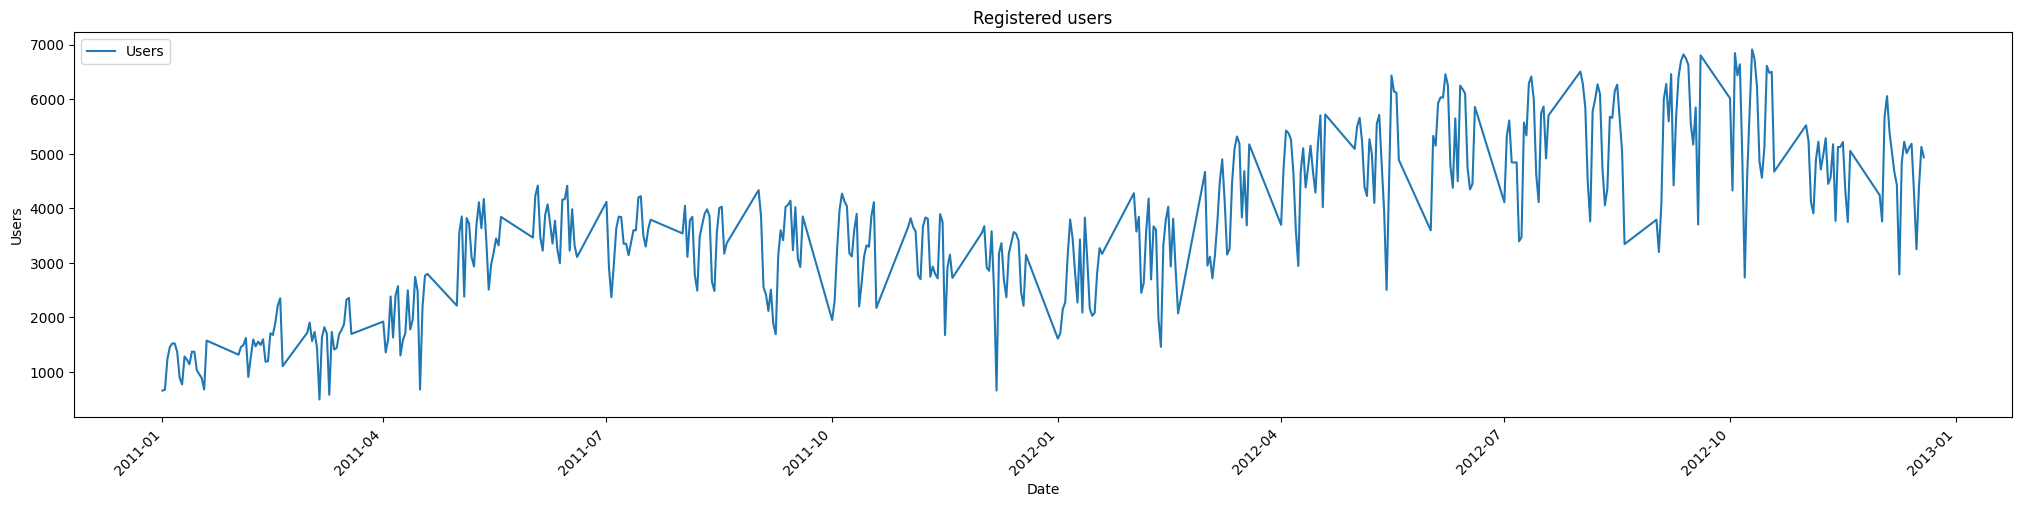

In [7]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=45, ha='right')
plt.plot(yulu_df_registered_by_date['date'], yulu_df_registered_by_date['registered'], label='Users')
plt.title('Registered users')
plt.xlabel('Date')
plt.ylabel('Users')
plt.legend(loc='upper left');

**The chart illustrates the dynamics of registered users over the period from 2011 to 2013.**

***Overall Growth:***

The number of registered users demonstrates a steady increase, indicating the success of the service during this time.

***Fluctuations:***

Although the trend is upward, there are significant fluctuations in the number of registrations. Potential explanations include:
- Daily variations: These might depend on factors such as weather, days of the week, or public holidays. This hypothesis can be tested using the available data.
- Seasonal or broader fluctuations: Larger-scale changes visible on the chart may be associated with marketing campaigns or seasonal patterns. For instance, a decline in registrations is noticeable during the November-February period.

This analysis highlights both the consistent growth of the service and the potential influence of external factors on user registration trends.

5. **Histogram for registered users**

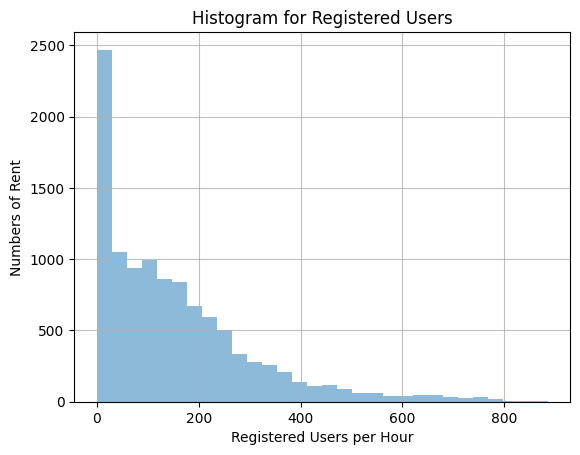

In [8]:
plt.hist(yulu_df.registered, bins=30, alpha=.5)
plt.grid(axis='both', alpha=.8)
plt.title('Histogram for Registered Users')
plt.xlabel('Registered Users per Hour')
plt.ylabel('Numbers of Rent');

**Analysis of the Histogram**

- The histogram shows a right-skewed distribution. Most of the bike rentals by registered users occur at low hourly rates, with the majority falling below 200 rentals per hour.
- The high frequency at lower values suggests that bike rentals are concentrated during less busy periods or smaller-scale usage across many hours.
- The long tail indicates occasional high-demand hours with significantly more rentals, possibly driven by specific events, peak hours, or seasonal effects.
- This pattern highlights that while regular usage dominates, occasional spikes in demand exist and could benefit from further investigation to optimize resources.




6. **Scatter Plot for Humidity and Number of Rents**

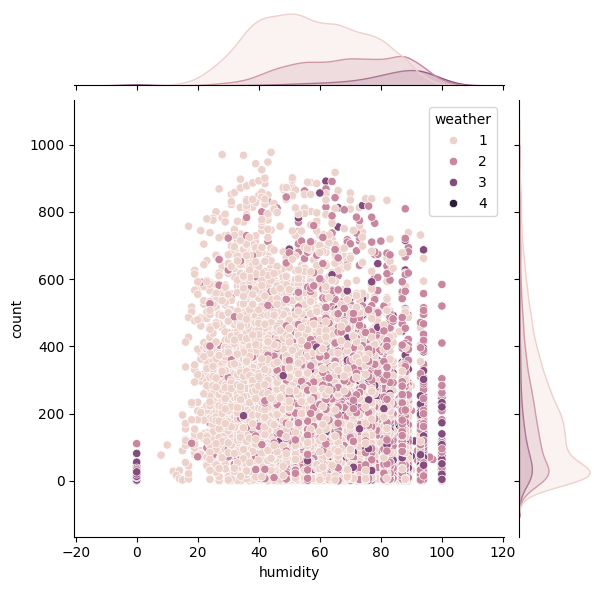

In [9]:
sns.jointplot(data=yulu_df, x="humidity", y="count", hue="weather");

**Observations:**

1. The majority of bike rentals occur at a humidity level of 40-80%, which is natural as this range often correlates with favorable weather conditions.
Impact of Weather on Rental Numbers:

2. Weather Condition 1 (clear, partly cloudy, or mostly sunny):
- The highest number of rentals is observed during good, rain-free weather. This is entirely expected and logical.
- Weather Condition 2 (foggy or overcast):
Rentals during this weather are 2.5 times fewer compared to Weather Condition 1. Most rentals occur at 60-80% humidity, suggesting that such conditions are still reasonably comfortable for cycling.
- Weather Condition 3 (light rain or light snow):
Rentals are 8.4 times lower compared to Weather Condition 1. This significant decrease is understandable as people prefer more convenient modes of transportation in such conditions.
- Weather Condition 4 (heavy rain, snow, or thunderstorms):
Only one rental was recorded under this condition. Clearly, such weather deters almost everyone from cycling.

3. The density distribution indicates that the highest number of rentals occurs at a humidity level of 40-60%, which reflects the most comfortable conditions for cyclists. Rental numbers decrease in both low and high humidity scenarios.

**Conclusions:**

- Bike rentals are most active during favorable weather conditions (clear or partly cloudy skies) and at moderate humidity levels. This suggests that an increase in demand for bikes can be expected in such weather.
- Poor weather conditions significantly reduce (or nearly eliminate, as seen in Weather Condition 4) the number of rentals. This should be considered when planning operations.
- Weather forecasts can be used to predict changes in demand, helping to anticipate both increases and decreases in bike rentals.







7. **Spring/Summer for Registered/Casual Users Analysis**

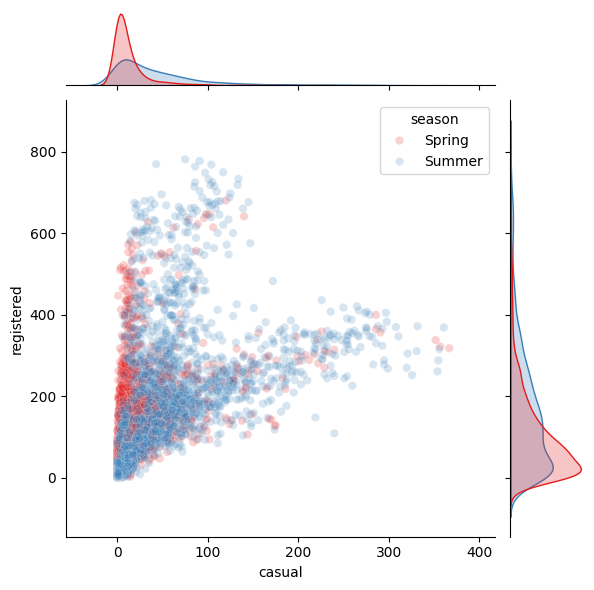

In [10]:
season = yulu_df[(yulu_df.season == 1) | (yulu_df.season == 2)]

g = sns.jointplot(data=season, x="casual", y="registered", hue='season', alpha=0.2, palette='Set1')

new_labels = ['Spring', 'Summer']
for t, label in zip(g.ax_joint.legend_.texts, new_labels):
    t.set_text(label)

**Observations:**

1. The graph shows that even with minimal rentals from casual users, many registered users continue to rent bikes. This is particularly evident in spring (red dots along the Y-axis).
2.  During summer (blue dots), there is a noticeable increase in rentals among casual users, likely tourists who actively use bikes.

**Conclusions:**

- Spring: There are more registered users and fewer casual ones. Regular customers are more active during this season.
- Summer: An increase in casual users indicates a potential influx of tourists or seasonal users who rent bikes during this period.

8. **Analysis of Rentals on Workdays and Weekends for Registered and Casual Users**

<Figure size 500x500 with 0 Axes>

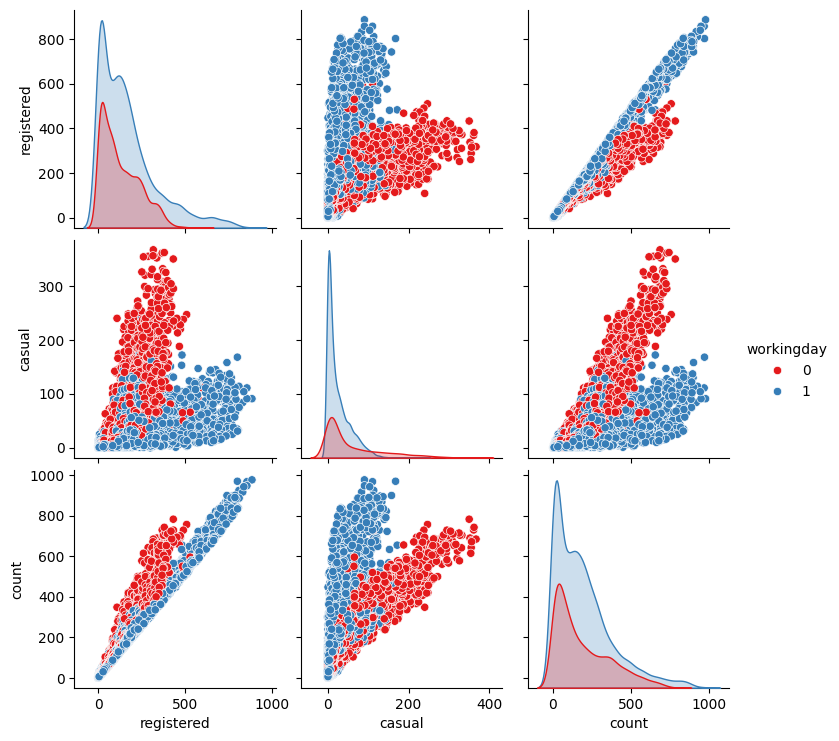

In [39]:
sort_yulu_df = yulu_df[['registered', 'casual', 'count', 'workingday']]

plt.figure(figsize=(5,5))
sns.pairplot(data=sort_yulu_df, hue="workingday", palette='Set1');

**Observations:**

- Weekday Histogram (Blue): The peak near zero indicates a large number of days with a low number of rentals. However, the histogram stretches along the X-axis, signifying that there are occasional days with high rental counts, though they are less frequent.
- Weekend Histogram (Red): A smaller peak near zero suggests fewer days with minimal rentals. The shorter spread along the X-axis shows that rentals on weekends do not reach the high levels observed on weekdays.
Overall, the total number of rentals on weekdays surpasses those on weekends.

**Scatterplot Analysis: Registered Users vs. Total Rentals:**

There is a clear linear relationship between the number of registered users and the total number of rentals.
This indicates that an increase in the number of registered users directly leads to higher rental activity on both weekdays and weekends.

**Scatterplot Analysis: Casual Users vs. Total Rentals:**

- The blue cluster of points along the Y-axis (total rentals) suggests that casual users are less active on weekdays and do not significantly impact the total rental count.
- The red diagonal cluster of points highlights that casual users become more active on weekends, leading to an increase in the total number of rentals.

**Conclusions:**

1. Weekdays: Rentals are predominantly driven by registered users, and the total rental count depends heavily on their activity. Casual users have minimal impact on rental counts during weekdays.
2. Weekends: The total number of rentals is influenced more by casual users, as they tend to rent bikes for leisure or recreational purposes. Registered users are less active during weekends.
3. While both registered and casual users contribute to the overall rental numbers, registered users provide a more consistent and predictable contribution compared to casual users.

# Summary & Key Insights

## **Summary**
This dataset provides hourly bike rental data, allowing us to analyze how various factors—such as weather, season, and user type—affect bike usage. By examining these trends, we can better understand rental patterns and the conditions that influence demand.

---

## **Key Insights**

### **1️⃣ Seasonal Trends**
- Bike rentals are highest in **summer and autumn**, likely due to favorable weather.
- Rentals drop significantly in **winter**, suggesting that colder temperatures discourage cycling.

### **2️⃣ Weather Conditions**
- Rentals are most frequent on **clear and partly cloudy days**.
- **Rain, snow, and fog** lead to a noticeable decline in bike usage, likely due to reduced comfort and safety.

### **3️⃣ User Behavior**
- **Registered users** are more consistent, renting bikes primarily on **working days**, which suggests commuting habits.
- **Casual users** rent more frequently on **weekends and holidays**, indicating recreational use.

### **4️⃣ Temperature & Comfort**
- As **temperature increases**, so do rentals, but excessive **humidity** appears to reduce demand.
- The **"feels like" temperature** (atemp) is closely linked to rental numbers, often more than actual temperature.

### **5️⃣ Wind Speed Impact**
- Higher **wind speeds** correlate with lower rentals, likely making cycling more challenging or less enjoyable.

---

## **Potential Applications**
- Adjusting **bike availability** based on seasonal and weather patterns.
- Developing **pricing strategies** to incentivize rentals during low-demand periods.
- Forecasting **future demand** using weather and seasonal trends for better resource management.

These insights can help optimize bike-sharing systems to improve user experience and operational efficiency.
